# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

## Getting the Data

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
#stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     #start = "2014-01-01", end = "2018-12-31")

In [3]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [4]:
stocks.head()

Adj Close                                        Close          \
                AMZN      BA    DIS     IBM     KO   MSFT    AMZN      BA   
Date                                                                        
2013-12-31    398.79  116.45  70.73  147.56  34.08  32.69  398.79  136.49   
2014-01-02    397.97  116.60  70.61  145.96  33.54  32.47  397.97  136.67   
2014-01-03    396.44  117.41  70.46  146.83  33.37  32.25  396.44  137.62   
2014-01-06    393.63  118.09  70.20  146.33  33.22  31.57  393.63  138.41   
2014-01-07    398.03  119.88  70.68  149.25  33.32  31.82  398.03  140.51   

                           ...   Open                         Volume           \
              DIS     IBM  ...    DIS     IBM     KO   MSFT     AMZN       BA   
Date                       ...                                                  
2013-12-31  76.40  187.57  ...  76.28  186.49  41.13  37.40  1996500  2096000   
2014-01-02  76.27  185.53  ...  76.04  187.21  41.12  37.35  2137800  3366700   
2014-01-03  76.11  186.64  ...  76.30  185.83  40.68  37.20  2210200  3177400   
2014-01-06  75.82  186.00  ...  76.53  187.15  40.48  36.85  3170600  4196500   
2014-01-07  76.34  189.71  ...  76.12  186.39  40.48  36.33  1916000  4238500   

                                                  
                DIS      IBM        KO      MSFT  
Date                                              
2013-12-31  4692300  3619700  11729200  17503500  
2014-01-02  5200900  4546500  12698600  30632200  
2014-01-03  4060700  4063200  10403400  31134800  
2014-01-06  6816200  4067800  11036300  43603700  
2014-01-07  4494900  5932300  11872300  35802800  

[5 rows x 36 columns]

In [5]:
stocks.tail()

Adj Close                                          Close          \
                AMZN      BA     DIS     IBM     KO   MSFT     AMZN      BA   
Date                                                                          
2018-12-21   1377.45  297.69  103.58  105.86  46.11  96.80  1377.45  304.55   
2018-12-24   1343.96  287.53   99.73  102.65  44.55  92.76  1343.96  294.16   
2018-12-26   1470.90  306.86  105.18  106.29  45.50  99.09  1470.90  313.93   
2018-12-27   1461.64  310.00  105.86  108.57  46.07  99.71  1461.64  317.14   
2018-12-28   1478.02  309.25  106.64  107.86  45.75  98.93  1478.02  316.38   

                            ...    Open                           Volume  \
               DIS     IBM  ...     DIS     IBM     KO    MSFT      AMZN   
Date                        ...                                            
2018-12-21  104.22  110.94  ...  106.47  112.50  47.26  101.63  13640300   
2018-12-24  100.35  107.57  ...  103.23  109.90  47.62   97.68   7220000   
2018-12-26  105.83  111.39  ...  100.49  108.00  45.88   95.14  10411800   
2018-12-27  106.52  113.78  ...  104.41  109.99  46.74   99.30   9722000   
2018-12-28  107.30  113.03  ...  107.28  114.22  47.89  102.09   8829000   

                                                              
                 BA       DIS       IBM        KO       MSFT  
Date                                                          
2018-12-21  7641700  15530600  10386500  32477700  111242100  
2018-12-24  3435300   7133000   3821400  10733700   43935200  
2018-12-26  4843400   9422800   6645800  14342600   51634800  
2018-12-27  4341100   8201400   6045600  16966500   49498500  
2018-12-28  3725200   7620500   5117500  13218200   38196300  

[5 rows x 36 columns]

In [6]:
stocks = stocks["Adj Close"].copy()

In [7]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.79,116.45,70.73,147.56,34.08,32.69
2014-01-02,397.97,116.60,70.61,145.96,33.54,32.47
2014-01-03,396.44,117.41,70.46,146.83,33.37,32.25
2014-01-06,393.63,118.09,70.20,146.33,33.22,31.57
2014-01-07,398.03,119.88,70.68,149.25,33.32,31.82


In [8]:
stocks.to_csv("port_stocks.csv")

## Creating the equal-weighted Portfolio

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [10]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [11]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.7900,116.4500,70.7300,147.5600,34.0800,32.6900
2014-01-02,397.9700,116.6000,70.6100,145.9600,33.5400,32.4700
2014-01-03,396.4400,117.4100,70.4600,146.8300,33.3700,32.2500
2014-01-06,393.6300,118.0900,70.2000,146.3300,33.2200,31.5700
2014-01-07,398.0300,119.8800,70.6800,149.2500,33.3200,31.8200


In [12]:
ret = stocks.pct_change().dropna()

In [13]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [14]:
ret.mean(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [15]:
no_assets = len(stocks.columns)
no_assets

6

In [16]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [18]:
ret.dot(weights)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [19]:
ret["EWP"] = ret.dot(weights)

In [20]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0060
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0008
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0107
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068


In [21]:
summary = ret.agg(["mean", "std"]).T

In [22]:
summary

,mean,std
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [23]:
summary.columns = ["Return", "Risk"]

In [24]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [25]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316
EWP,0.1514,0.1514


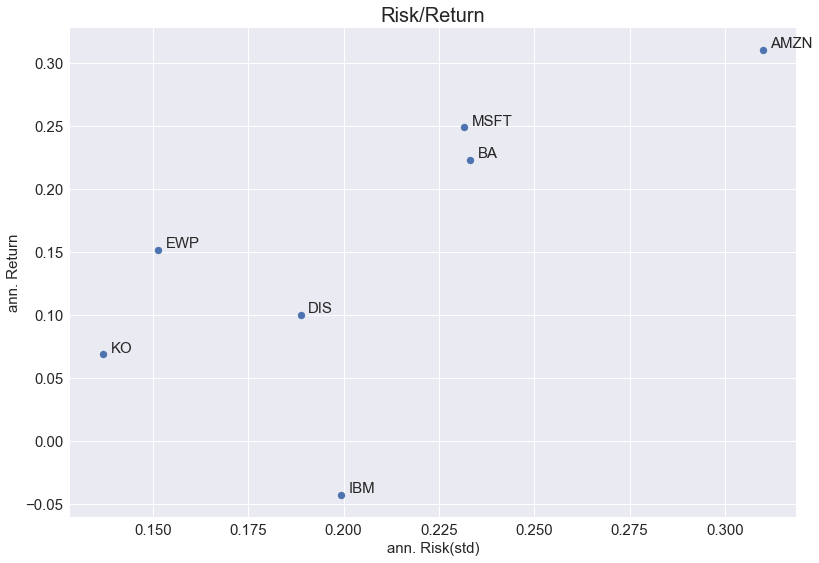

In [26]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [27]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating many Random Portfolios

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [29]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [30]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.7900,116.4500,70.7300,147.5600,34.0800,32.6900
2014-01-02,397.9700,116.6000,70.6100,145.9600,33.5400,32.4700
2014-01-03,396.4400,117.4100,70.4600,146.8300,33.3700,32.2500
2014-01-06,393.6300,118.0900,70.2000,146.3300,33.2200,31.5700
2014-01-07,398.0300,119.8800,70.6800,149.2500,33.3200,31.8200


In [31]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [32]:
summary = ann_risk_return(ret)

In [33]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316


In [34]:
noa = len(stocks.columns)
noa

6

In [35]:
nop = 100000
nop

100000

In [36]:
np.random.random(10*6).reshape(10,6)

array([[0.88602877, 0.1489926 , 0.1083082 , 0.20125305, 0.24927758,
        0.28100285],
       [0.92785953, 0.25031684, 0.28243448, 0.39725648, 0.4528229 ,
        0.82438971],
       [0.65385089, 0.7358638 , 0.27598449, 0.96087211, 0.33362929,
        0.01135045],
       [0.83860064, 0.55683056, 0.79691785, 0.57789653, 0.44308746,
        0.55295183],
       [0.2757656 , 0.36999437, 0.01419818, 0.80176443, 0.84316399,
        0.55950092],
       [0.16011597, 0.43364741, 0.01594196, 0.51262097, 0.92691604,
        0.23793219],
       [0.75692727, 0.92875002, 0.83338242, 0.15210743, 0.70616558,
        0.0664369 ],
       [0.7502256 , 0.12499458, 0.8554255 , 0.27491735, 0.63994887,
        0.9680717 ],
       [0.96572739, 0.51201251, 0.68369177, 0.74968094, 0.07492684,
        0.1609072 ],
       [0.12889438, 0.92193484, 0.02293954, 0.75130502, 0.80510336,
        0.04911333]])

In [37]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [38]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.51954687, 0.85226532, 0.87403327, 0.10039779, 0.25265273,
        0.01875777],
       [0.64206112, 0.41780645, 0.76066273, 0.33994549, 0.1620518 ,
        0.94008933],
       [0.23120286, 0.86951896, 0.50415836, 0.32237088, 0.25906289,
        0.90163486]])

In [39]:
matrix.sum(axis = 1, keepdims= True)

array([[2.90335017],
       [3.61087108],
       [1.99223329],
       ...,
       [2.61765375],
       [3.26261692],
       [3.08794881]])

In [40]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [41]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [42]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [43]:
port_ret = ret.dot(weights.T)

In [44]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.0075,-0.0046,-0.0068,-0.0068,-0.0051,-0.0067,-0.0050,-0.0056,-0.0070,-0.0082,...,-0.0020,-0.0088,-0.0042,-0.0044,-0.0069,-0.0064,-0.0055,-0.0025,-0.0045,-0.0045
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0024,0.0001,-0.0013,...,0.0007,-0.0015,0.0031,0.0004,-0.0017,-0.0003,-0.0011,0.0005,-0.0019,-0.0005
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0057,-0.0078,-0.0045,-0.0024,-0.0081,-0.0055,-0.0061,...,-0.0017,-0.0063,-0.0015,-0.0053,-0.0091,-0.0078,-0.0058,-0.0015,-0.0082,-0.0064
2014-01-07,0.0104,0.0109,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0101,...,0.0105,0.0105,0.0140,0.0127,0.0116,0.0117,0.0105,0.0105,0.0102,0.0109
2014-01-08,-0.0057,-0.0046,-0.0067,-0.0077,-0.0056,-0.0088,-0.0061,-0.0103,-0.0060,-0.0087,...,-0.0061,-0.0066,-0.0042,-0.0048,-0.0073,-0.0114,-0.0049,-0.0038,-0.0079,-0.0082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0284,-0.0238,-0.0255,-0.0321,-0.0309,-0.0242,-0.0288,-0.0297,-0.0320,-0.0275
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0345,-0.0320,-0.0334,-0.0326,-0.0330,-0.0360,-0.0332,-0.0331,-0.0347,-0.0357
2018-12-26,0.0555,0.0653,0.0548,0.0535,0.0653,0.0499,0.0545,0.0578,0.0546,0.0490,...,0.0614,0.0506,0.0572,0.0633,0.0601,0.0532,0.0610,0.0628,0.0644,0.0603


In [45]:
port_summary = ann_risk_return(port_ret)

In [46]:
port_summary

,Return,Risk
0,0.1494,0.1534
1,0.1921,0.1711
2,0.1074,0.1588
3,0.1320,0.1466
4,0.1953,0.1723
...,...,...
99995,0.1236,0.1553
99996,0.1829,0.1611
99997,0.1744,0.1637
99998,0.1837,0.1680


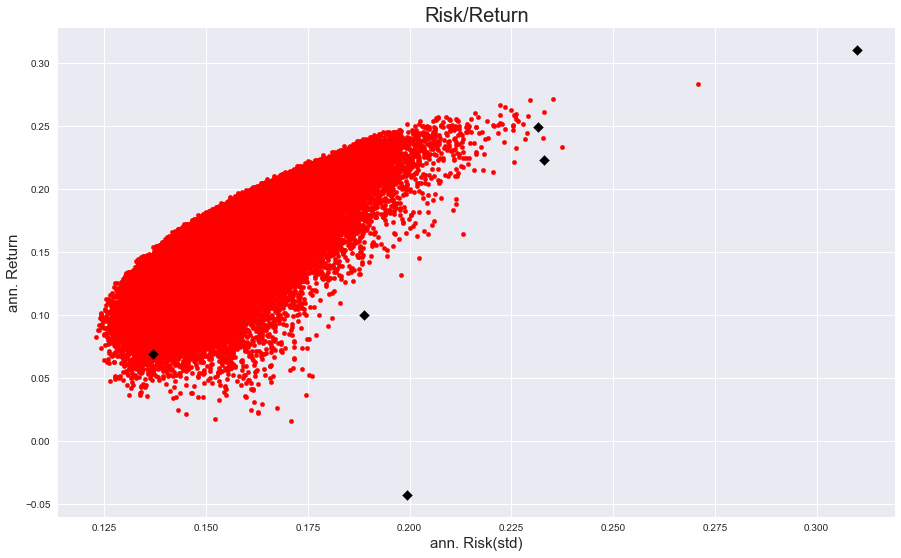

In [47]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [48]:
risk_free_return = 0.017
risk_free_risk = 0

In [49]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

## Portfolio Analysis with the Sharpe Ratio

In [59]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007


In [51]:
port_summary.head()

,Return,Risk
0,0.1494,0.1534
1,0.1921,0.1711
2,0.1074,0.1588
3,0.1320,0.1466
4,0.1953,0.1723


In [52]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [53]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007


In [54]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [55]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1494,0.1534,0.8631
1,0.1921,0.1711,1.0231
2,0.1074,0.1588,0.5689
3,0.1320,0.1466,0.7842
4,0.1953,0.1723,1.0345


In [56]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [57]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1512,0.1564,0.8520
std,0.0307,0.0125,0.1535
min,0.0159,0.1229,-0.0062
25%,0.1312,0.1475,0.7588
50%,0.1513,0.1553,0.8650
75%,0.1716,0.1639,0.9662
max,0.2833,0.2708,1.1813


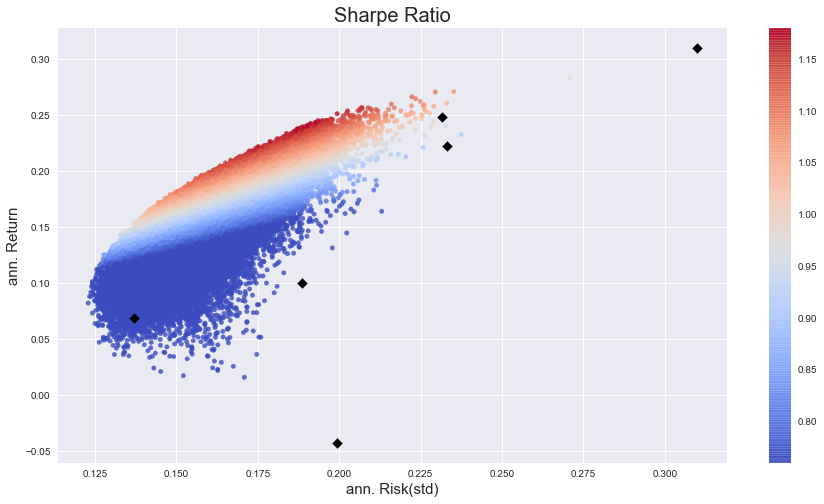

In [58]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

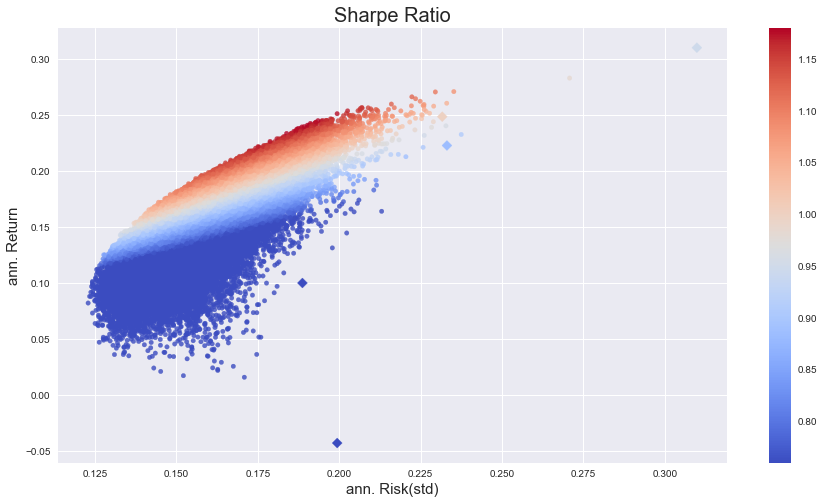

In [60]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [61]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1494,0.1534,0.8631
1,0.1921,0.1711,1.0231
2,0.1074,0.1588,0.5689
3,0.1320,0.1466,0.7842
4,0.1953,0.1723,1.0345


In [62]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1512,0.1564,0.8520
std,0.0307,0.0125,0.1535
min,0.0159,0.1229,-0.0062
25%,0.1312,0.1475,0.7588
50%,0.1513,0.1553,0.8650
75%,0.1716,0.1639,0.9662
max,0.2833,0.2708,1.1813


In [63]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [64]:
msrp = port_summary.Sharpe.idxmax()
msrp

76879

In [65]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2428
Risk     0.1911
Sharpe   1.1813
Name: 76879, dtype: float64

In [66]:
msrp_w = weights[msrp, :]
msrp_w

array([0.27682827, 0.39151246, 0.01705514, 0.00084837, 0.05666669,
       0.25708907])

In [67]:
pd.Series(index = stocks.columns, data = msrp_w)

AMZN   0.2768
BA     0.3915
DIS    0.0171
IBM    0.0008
KO     0.0567
MSFT   0.2571
dtype: float64

In [68]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

In [69]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [70]:
ret["MP"] = ret.dot(opt_weights)

In [71]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0027
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0012
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0113
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [72]:
summary = ann_risk_return(ret)

In [73]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [74]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


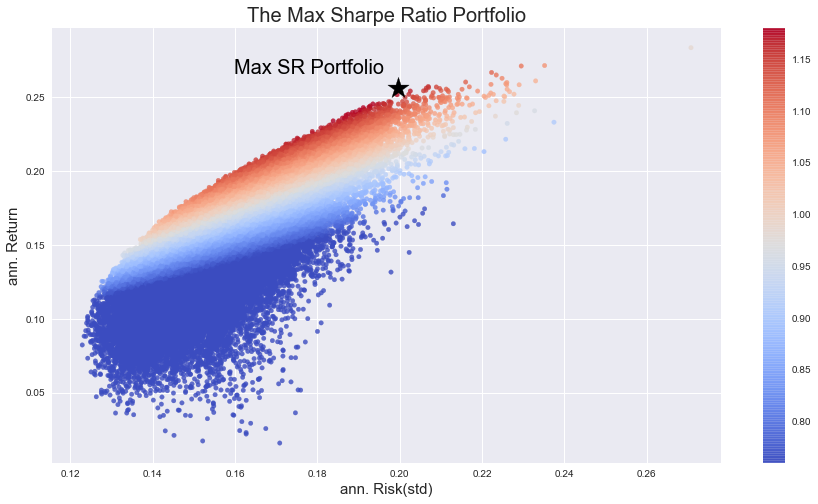

In [75]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

----------------------------------------

## The Sharpe Ratio - a graphical intuition (PP)

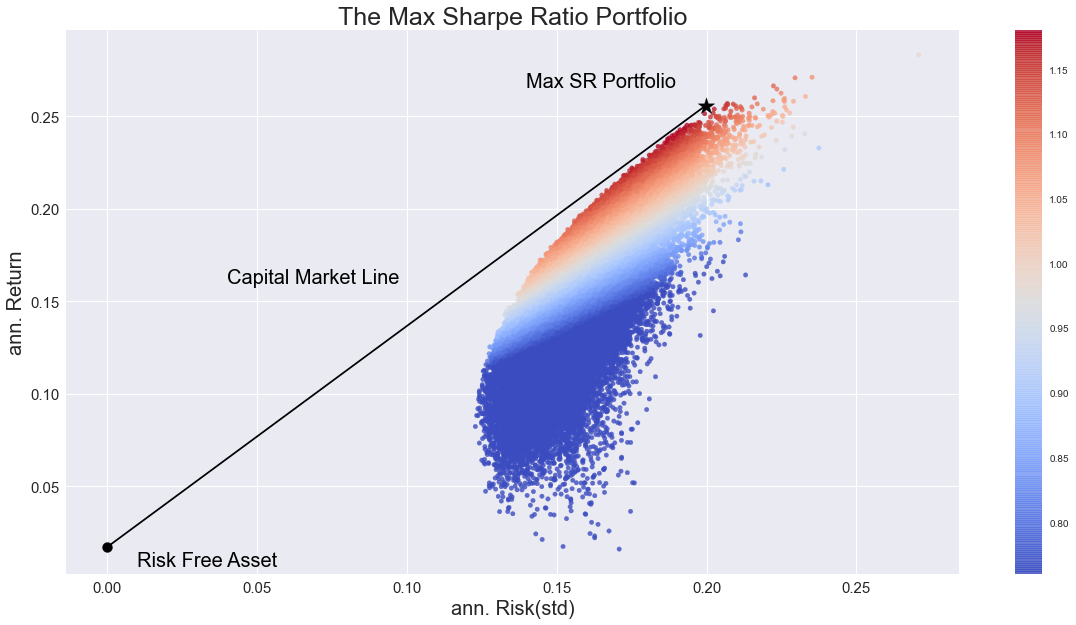

In [76]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

## Capital Market Line & Two-Fund-Theorem (PP)

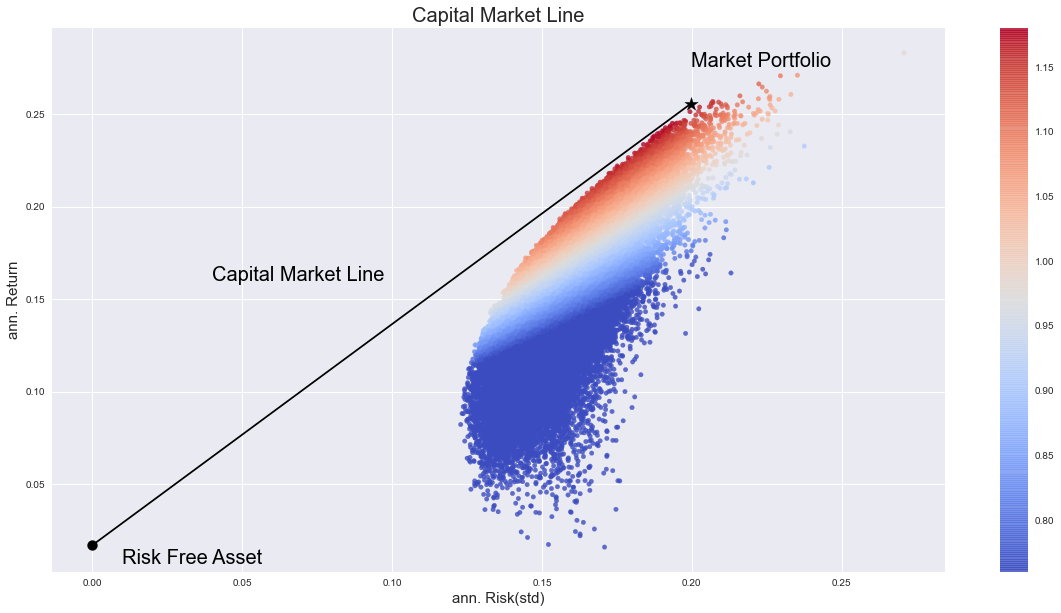

In [77]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

## The Portfolio Diversification Effect

In [78]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


In [79]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [80]:
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

Return   0.2558
Risk     0.2525
dtype: float64

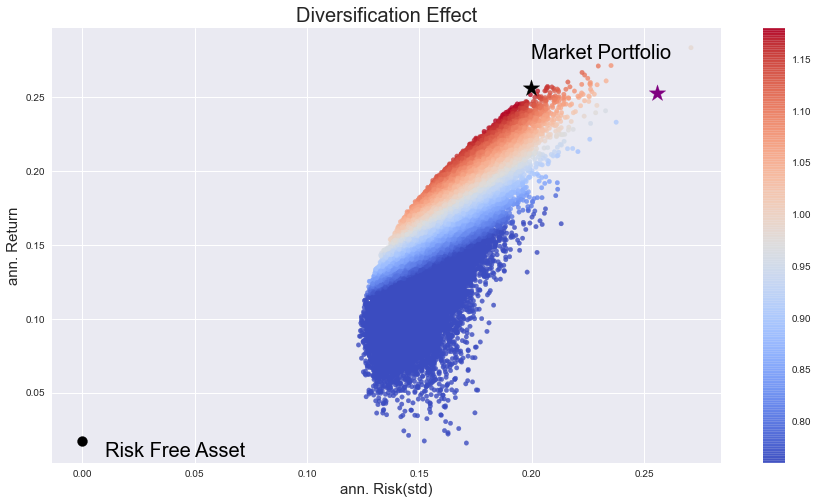

In [81]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

In [82]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


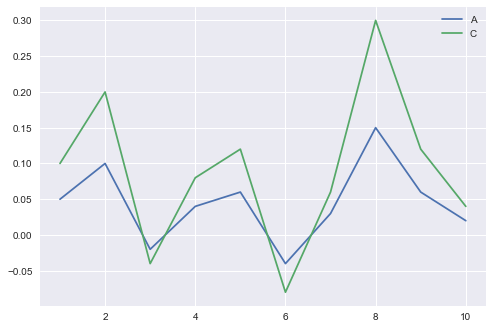

In [83]:
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

In [84]:
three_stocks.iloc[:, :3].corr()

,A,B,C
A,1.0000,-1.0000,1.0000
B,-1.0000,1.0000,-1.0000
C,1.0000,-1.0000,1.0000


In [85]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [86]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [87]:
three_stocks

,A,B,C,AB,AC
1,0.0500,0.0500,0.1000,0.0500,0.0750
2,0.1000,0.0000,0.2000,0.0500,0.1500
3,-0.0200,0.1200,-0.0400,0.0500,-0.0300
4,0.0400,0.0600,0.0800,0.0500,0.0600
5,0.0600,0.0400,0.1200,0.0500,0.0900
6,-0.0400,0.1400,-0.0800,0.0500,-0.0600
7,0.0300,0.0700,0.0600,0.0500,0.0450
8,0.1500,-0.0500,0.3000,0.0500,0.2250
9,0.0600,0.0400,0.1200,0.0500,0.0900
10,0.0200,0.0800,0.0400,0.0500,0.0300


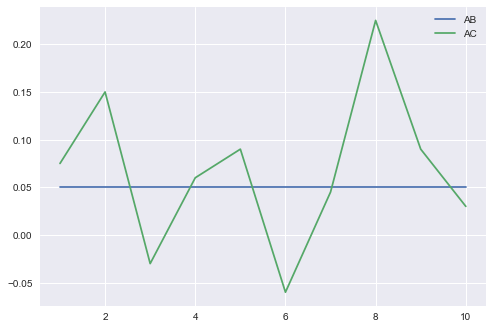

In [88]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [89]:
summ = three_stocks.agg(["mean", "std"])
summ

,A,B,C,AB,AC
mean,0.0450,0.0550,0.0900,0.0500,0.0675
std,0.0546,0.0546,0.1092,0.0000,0.0819


In [90]:
summ[["A", "B"]].mean(axis = 1)

mean   0.0500
std    0.0546
dtype: float64

In [91]:
summ[["A", "C"]].mean(axis = 1)

mean   0.0675
std    0.0819
dtype: float64

In [92]:
ret.corr()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,1.0000,0.3610,0.3413,0.3005,0.2123,0.5328,0.7920
BA,0.3610,1.0000,0.4185,0.4084,0.3122,0.4105,0.7391
DIS,0.3413,0.4185,1.0000,0.3890,0.3231,0.4048,0.4918
IBM,0.3005,0.4084,0.3890,1.0000,0.3364,0.4644,0.4984
KO,0.2123,0.3122,0.3231,0.3364,1.0000,0.3398,0.3670
MSFT,0.5328,0.4105,0.4048,0.4644,0.3398,1.0000,0.8362
MP,0.7920,0.7391,0.4918,0.4984,0.3670,0.8362,1.0000


## Systematic vs. unsystematic (diversifiable) Risk

In [93]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


In [94]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [95]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960
BA,0.2231,0.2331,0.8840,0.0543
DIS,0.1002,0.1887,0.4408,0.0356
IBM,-0.0428,0.1994,-0.3002,0.0398
KO,0.0685,0.1370,0.3757,0.0188
MSFT,0.2488,0.2316,1.0007,0.0537
MP,0.2558,0.1997,1.1962,0.0399


In [96]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0027
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0012
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0113
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [97]:
COV = ret.cov()*252

In [98]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,0.0960,0.0261,0.0200,0.0186,0.0090,0.0382,0.0490
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0344
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0185
IBM,0.0186,0.0190,0.0146,0.0398,0.0092,0.0214,0.0198
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0100
MSFT,0.0382,0.0222,0.0177,0.0214,0.0108,0.0537,0.0387
MP,0.0490,0.0344,0.0185,0.0198,0.0100,0.0387,0.0399


In [99]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [100]:
COV.iloc[:-1, -1].dot(opt_weights)

0.03986364491467865

In [101]:
COV.iloc[-1, -1]

0.039863644914678635

In [102]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [103]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490
BA,0.2231,0.2331,0.8840,0.0543,0.0344
DIS,0.1002,0.1887,0.4408,0.0356,0.0185
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198
KO,0.0685,0.1370,0.3757,0.0188,0.0100
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387
MP,0.2558,0.1997,1.1962,0.0399,0.0399


In [104]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [105]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000


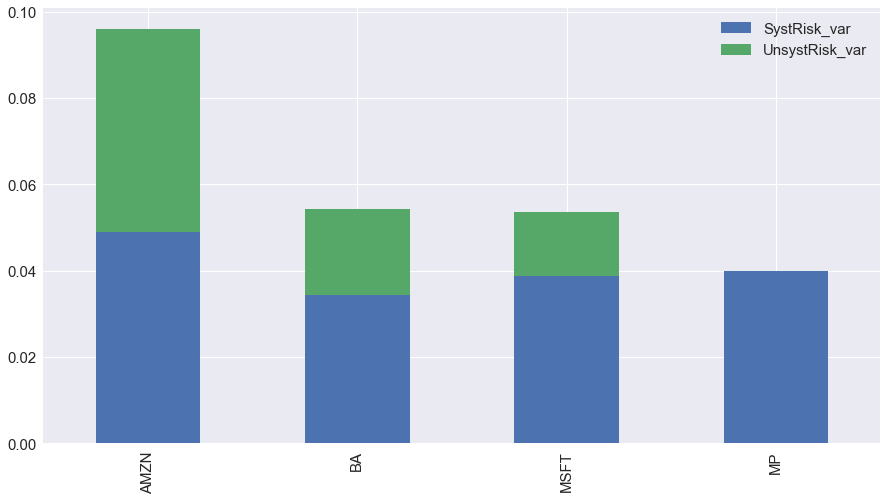

In [106]:
summary.iloc[[0, 1, 5, 6], 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

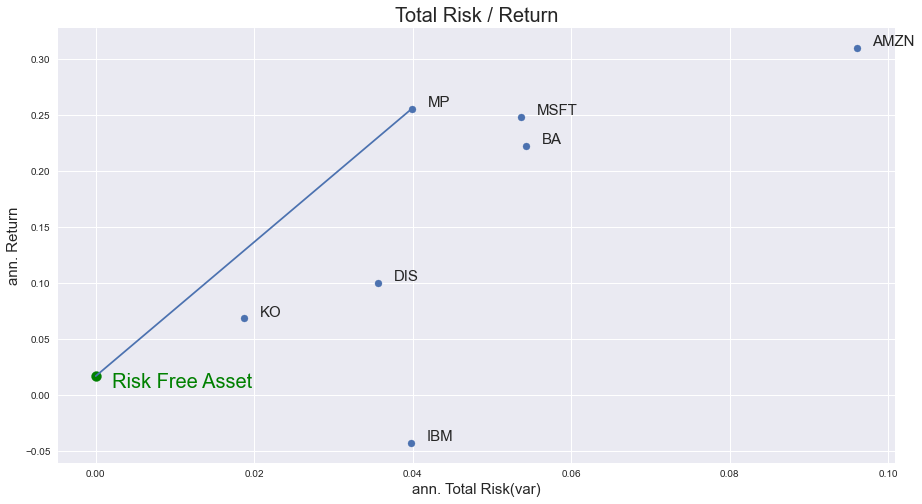

In [107]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

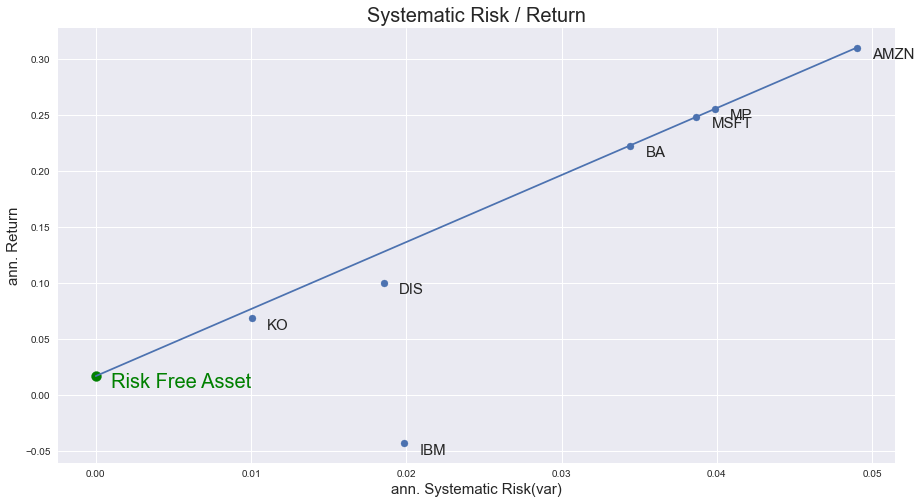

In [108]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

### CAPM & the Security Market Line

In [109]:
pd.options.display.float_format = '{:.2f}'.format

In [110]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.31,0.31,0.95,0.10,0.05,0.05
BA,0.22,0.23,0.88,0.05,0.03,0.02
DIS,0.10,0.19,0.44,0.04,0.02,0.02
IBM,-0.04,0.20,-0.30,0.04,0.02,0.02
KO,0.07,0.14,0.38,0.02,0.01,0.01
MSFT,0.25,0.23,1.00,0.05,0.04,0.01
MP,0.26,0.20,1.20,0.04,0.04,-0.00


In [111]:
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

AMZN   1.23
BA     0.86
DIS    0.46
IBM    0.50
KO     0.25
MSFT   0.97
MP     1.00
Name: SystRisk_var, dtype: float64

In [112]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [113]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46
IBM,-0.04,0.20,-0.30,0.04,0.02,0.02,0.50
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00


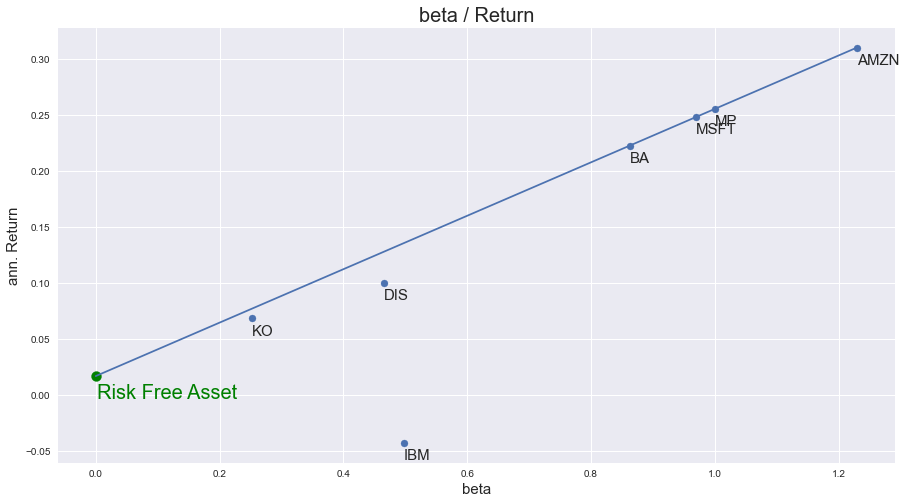

In [114]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [115]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

0.3105665063399088

In [116]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [117]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.04,0.20,-0.30,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26


## Beta and Alpha

In [118]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.04,0.20,-0.30,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26


In [119]:
summary["alpha"] = summary.Return - summary.capm_ret

In [120]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,-0.00
2014-01-03,-0.00,0.01,-0.00,0.01,-0.01,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.00


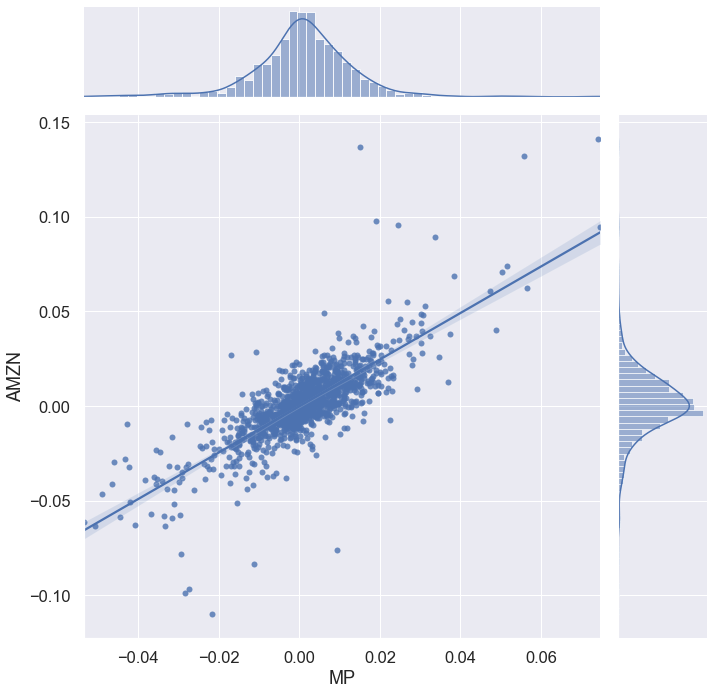

In [121]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [126]:
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.22913954e+00, -1.58326578e-05])

In [123]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

1.2291395387422712

In [124]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31,-0.00
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22,-0.00
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13,-0.03
IBM,-0.04,0.20,-0.30,0.04,0.02,0.02,0.50,0.14,-0.18
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08,-0.01
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25,0.00
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26,0.00


## Final Considerations (and a more real world scenario)

In [127]:
ret.drop(columns = ["MP"], inplace =True)

In [128]:
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.01,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [129]:
mcap_weights = pd.read_csv("mcap_weights.csv", parse_dates = ["Date"], index_col = "Date")

In [130]:
mcap_weights

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-02,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-03,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-06,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-07,0.19,0.08,0.13,0.16,0.17,0.27
...,...,...,...,...,...,...
2018-12-21,0.32,0.08,0.09,0.05,0.10,0.36
2018-12-24,0.33,0.08,0.09,0.05,0.10,0.36
2018-12-26,0.33,0.08,0.09,0.05,0.09,0.36


In [131]:
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [132]:
summary = ann_risk_return(ret)

In [133]:
summary

,Return,Risk
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.04,0.20
KO,0.07,0.14
MSFT,0.25,0.23
MCAP_P,0.18,0.17


In [134]:
COV = ret.cov()*252

In [135]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.10,0.03,0.02,0.02,0.01,0.04,0.04
BA,0.03,0.05,0.02,0.02,0.01,0.02,0.02
DIS,0.02,0.02,0.04,0.01,0.01,0.02,0.02
IBM,0.02,0.02,0.01,0.04,0.01,0.02,0.02
KO,0.01,0.01,0.01,0.01,0.02,0.01,0.01
MSFT,0.04,0.02,0.02,0.02,0.01,0.05,0.03
MCAP_P,0.04,0.02,0.02,0.02,0.01,0.03,0.03


In [136]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [137]:
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [138]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.03,1.15
MCAP_P,0.18,0.17,0.03,1.00


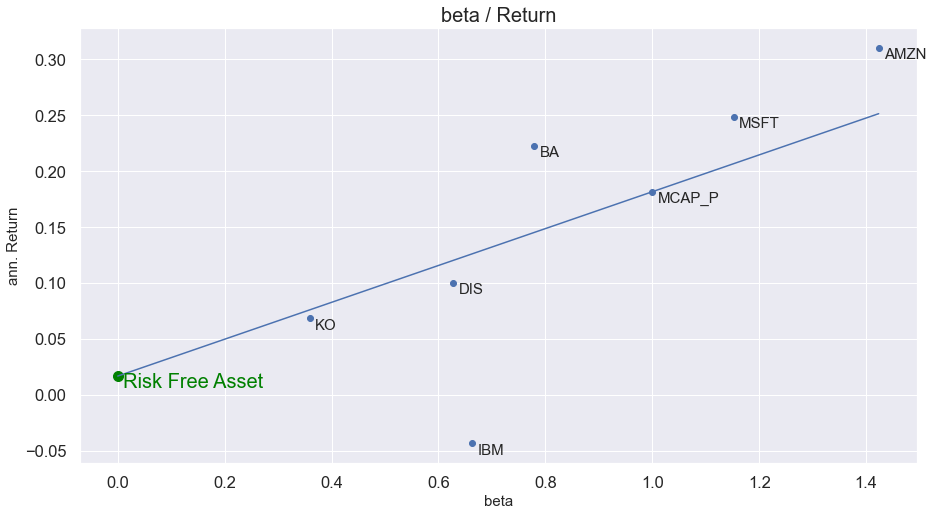

In [139]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

## Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks

In [140]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.01,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01


In [141]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.03,1.15
MCAP_P,0.18,0.17,0.03,1.00


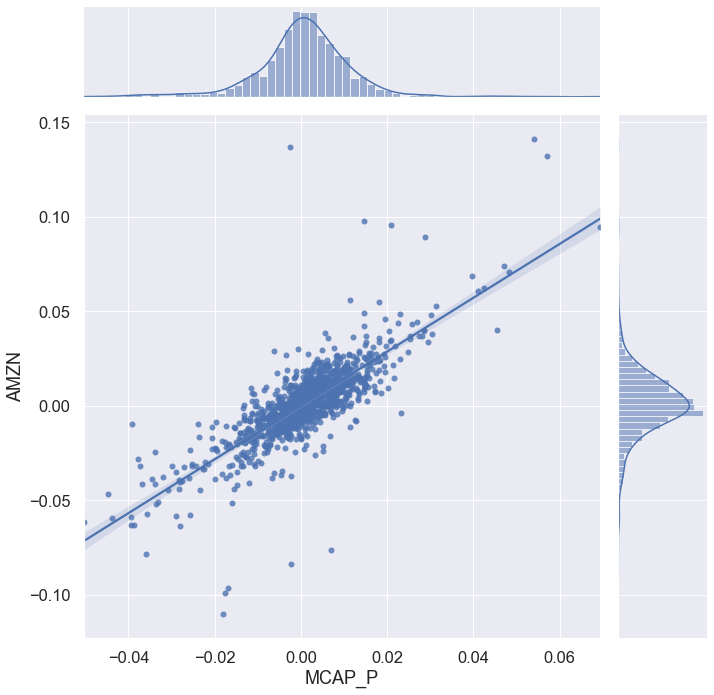

In [142]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [143]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

array([1.42357566e+00, 2.05469089e-04])

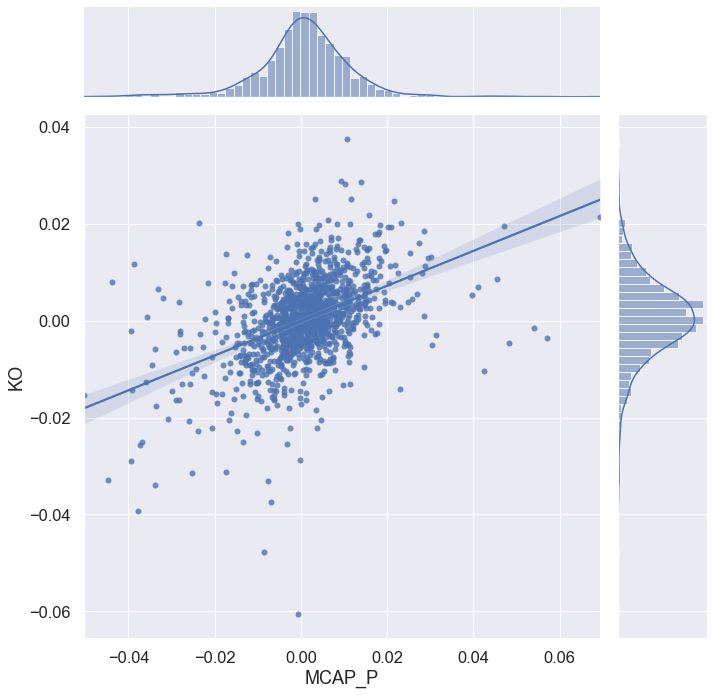

In [144]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [145]:
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

[*********************100%***********************]  2 of 2 completed


In [146]:
stocks

,AMZN,KO
Date,,
2007-12-31,92.64,30.68
2008-01-02,96.25,30.55
2008-01-03,95.21,30.86
2008-01-04,88.79,30.92
2008-01-07,88.82,31.66
...,...,...
2018-12-21,1377.45,47.57
2018-12-24,1343.96,45.96
2018-12-26,1470.90,46.94


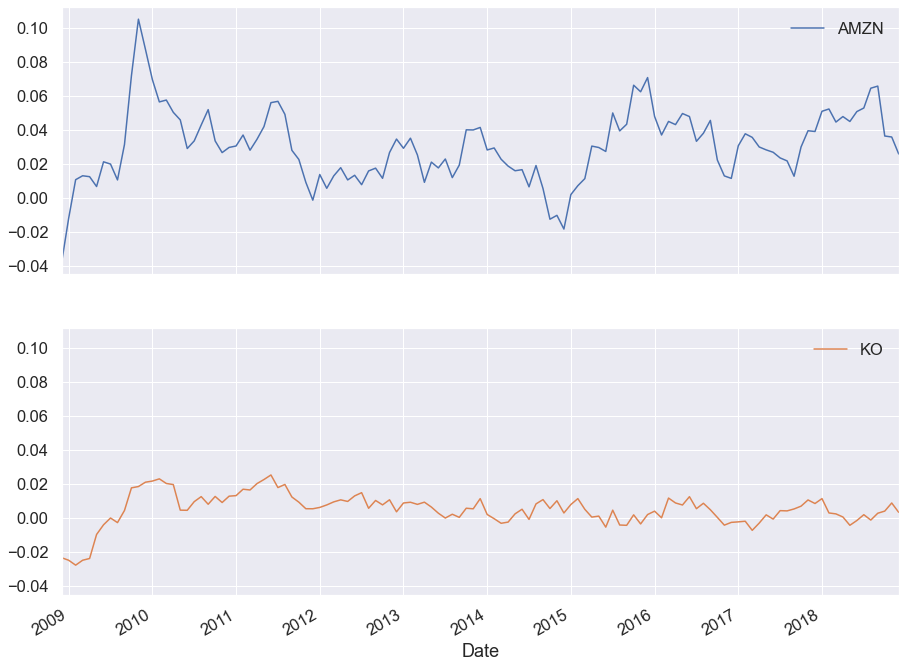

In [147]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

In [148]:
pd.options.display.float_format = '{:.4f}'.format

## Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [149]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0068
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0023
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0085
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0101
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081


In [150]:
two_assets = ret.iloc[:, :2]
two_assets.head()

,AMZN,BA
Date,,
2014-01-02,-0.0021,0.0013
2014-01-03,-0.0038,0.0069
2014-01-06,-0.0071,0.0058
2014-01-07,0.0112,0.0152
2014-01-08,0.0098,0.0022


In [151]:
summ_two = ann_risk_return(two_assets)
summ_two

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331


In [152]:
w_AMZN = 0.6
w_BA = 0.4
ws = np.array([w_AMZN, w_BA])
ws

array([0.6, 0.4])

### Calculating Expected Portfolio Return

In [153]:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

AMZN   0.2000
BA     0.1500
dtype: float64

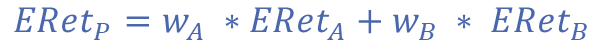

In [154]:
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

0.18

In [155]:
ERets.dot(ws)

0.18

### Calculating Expected Portfolio Risk

In [156]:
cov_matrix = two_assets.cov() * 252
cov_matrix

,AMZN,BA
AMZN,0.0960,0.0261
BA,0.0261,0.0543


In [157]:
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

0.09601449615106264

In [158]:
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

0.05433269118990709

In [159]:
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

0.02607357114517745

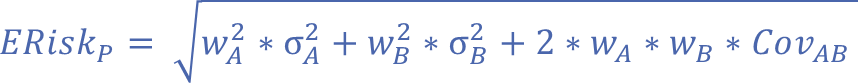

In [160]:
ERisk_P = np.sqrt(w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA)
ERisk_P

0.23616469540228247

In [162]:
np.sqrt(cov_matrix.dot(ws).dot(ws))

0.23616469540228247

### Many Random Portfolios

In [163]:
np.random.seed(123)
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [164]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [165]:
weights

array([[0.7087962 , 0.2912038 ],
       [0.29152056, 0.70847944],
       [0.62969057, 0.37030943],
       ...,
       [0.52028043, 0.47971957],
       [0.22215611, 0.77784389],
       [0.49742945, 0.50257055]])

In [166]:
Return = ERets.dot(weights.T)
Return

array([0.18543981, 0.16457603, 0.18148453, ..., 0.17601402, 0.16110781,
       0.17487147])

In [167]:
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

0      0.2522
1      0.2149
2      0.2402
3      0.2347
4      0.2302
        ...  
9995   0.2642
9996   0.2189
9997   0.2270
9998   0.2159
9999   0.2248
Length: 10000, dtype: float64

In [168]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

,Return,Risk
0,0.1854,0.2522
1,0.1646,0.2149
2,0.1815,0.2402
3,0.1794,0.2347
4,0.1775,0.2302
...,...,...
9995,0.1889,0.2642
9996,0.1710,0.2189
9997,0.1760,0.2270
9998,0.1611,0.2159


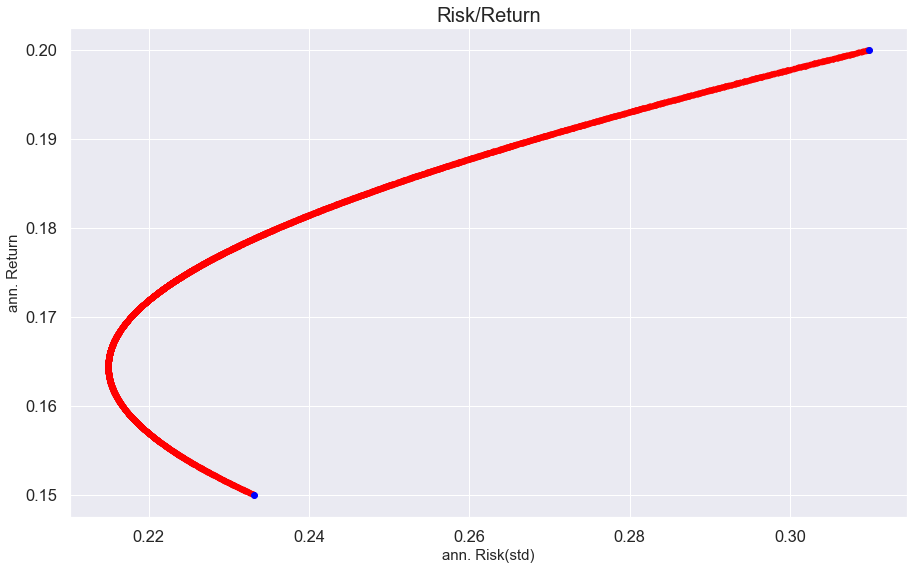

In [169]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Portfolios - not that simple

In [170]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0068
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0023
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0085
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0101
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081


In [171]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.0960,0.0261,0.0200,0.0186,0.0090,0.0382,0.0432
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0237
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0191
IBM,0.0186,0.0190,0.0146,0.0398,0.0092,0.0214,0.0201
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0109
MSFT,0.0382,0.0222,0.0177,0.0214,0.0108,0.0537,0.0350
MCAP_P,0.0432,0.0237,0.0191,0.0201,0.0109,0.0350,0.0304


In [172]:
COV_C = COV.iloc[:-1, :-1]
COV_C

,AMZN,BA,DIS,IBM,KO,MSFT
AMZN,0.0960,0.0261,0.0200,0.0186,0.0090,0.0382
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177
IBM,0.0186,0.0190,0.0146,0.0398,0.0092,0.0214
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108
MSFT,0.0382,0.0222,0.0177,0.0214,0.0108,0.0537


In [173]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4236
BA,0.2231,0.2331,0.0237,0.7793
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0428,0.1994,0.0201,0.6624
KO,0.0685,0.1370,0.0109,0.3597
MSFT,0.2488,0.2316,0.0350,1.1521
MCAP_P,0.1817,0.1742,0.0304,1.0000


In [174]:
summary_C = summary.iloc[:-1, :].copy()

In [175]:
summary_C

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4236
BA,0.2231,0.2331,0.0237,0.7793
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0428,0.1994,0.0201,0.6624
KO,0.0685,0.1370,0.0109,0.3597
MSFT,0.2488,0.2316,0.0350,1.1521


In [176]:
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [177]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3105,0.3099,0.0432,1.4236,0.2500
BA,0.2231,0.2331,0.0237,0.7793,0.1500
DIS,0.1002,0.1887,0.0191,0.6282,0.0800
IBM,-0.0428,0.1994,0.0201,0.6624,0.0800
KO,0.0685,0.1370,0.0109,0.3597,0.1000
MSFT,0.2488,0.2316,0.0350,1.1521,0.1500


In [178]:
noa = len(summary_C.index)
noa

6

In [179]:
nop = 1000000
nop

1000000

In [180]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [181]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.62483862, 0.59134382, 0.36809244, 0.68256896, 0.95087943,
        0.8901324 ],
       [0.77031552, 0.77814261, 0.14151563, 0.32447434, 0.62107081,
        0.66743122],
       [0.02079644, 0.80470884, 0.02576405, 0.20198792, 0.83794608,
        0.63565318]])

In [182]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [183]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.15210822, 0.14395438, 0.08960696, 0.16616186, 0.2314783 ,
        0.21669028],
       [0.23322045, 0.23559018, 0.04284522, 0.09823773, 0.18803518,
        0.20207124],
       [0.00823016, 0.31846242, 0.01019609, 0.07993644, 0.33161601,
        0.25155887]])

In [184]:
Return = summary_C.ER1.dot(weights.T)
Return

array([0.14283649, 0.15548457, 0.12751762, ..., 0.13573309, 0.15404448,
       0.12793294])

In [185]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

0        0.1534
1        0.1711
2        0.1588
3        0.1466
4        0.1723
          ...  
999995   0.1531
999996   0.1665
999997   0.1492
999998   0.1639
999999   0.1472
Length: 1000000, dtype: float64

In [186]:
Risk.shape

(1000000,)

In [187]:
Return.shape

(1000000,)

In [188]:
rf = 0.02

In [189]:
Sharpe = (Return - rf) / Risk

In [190]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ

,Return,Risk,Sharpe
0,0.1428,0.1534,0.8009
1,0.1555,0.1711,0.7918
2,0.1275,0.1588,0.6769
3,0.1276,0.1466,0.7339
4,0.1563,0.1723,0.7913
...,...,...,...
999995,0.1205,0.1531,0.6563
999996,0.1440,0.1665,0.7450
999997,0.1357,0.1492,0.7756
999998,0.1540,0.1639,0.8178


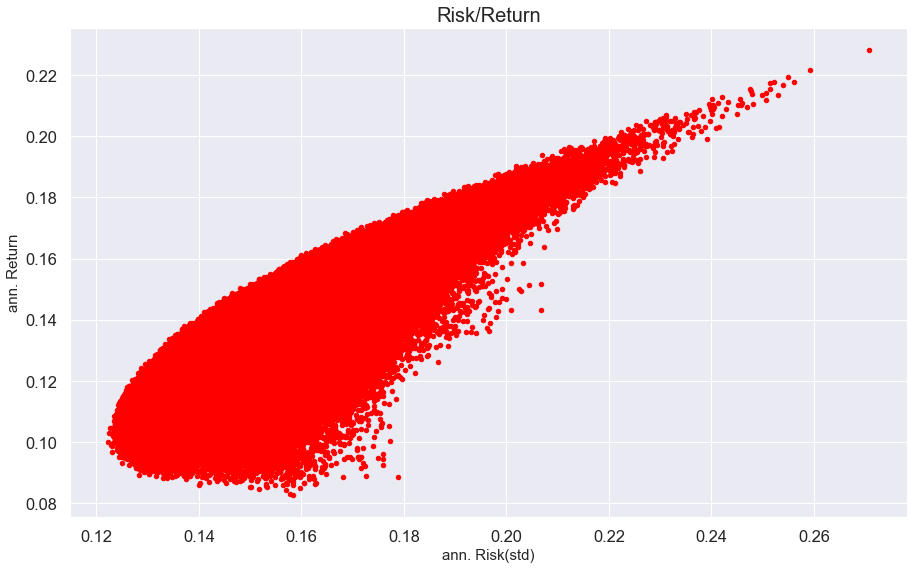

In [191]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [192]:
summ.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1565,0.7332
std,0.0151,0.0126,0.0594
min,0.0828,0.1223,0.3830
25%,0.1243,0.1476,0.6967
50%,0.1350,0.1554,0.7413
75%,0.1451,0.1641,0.7762
max,0.2283,0.2708,0.8834


In [193]:
summ.Sharpe.idxmax()

873915

In [194]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8834
Name: 873915, dtype: float64

In [195]:
weights[summ.Sharpe.idxmax()]

array([3.45964754e-01, 1.77094106e-01, 8.56191979e-05, 8.51874520e-03,
       4.54615917e-01, 1.37208588e-02])

In [196]:
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64

### Changing Expected Returns

In [197]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3105,0.3099,0.0432,1.4236,0.2500
BA,0.2231,0.2331,0.0237,0.7793,0.1500
DIS,0.1002,0.1887,0.0191,0.6282,0.0800
IBM,-0.0428,0.1994,0.0201,0.6624,0.0800
KO,0.0685,0.1370,0.0109,0.3597,0.1000
MSFT,0.2488,0.2316,0.0350,1.1521,0.1500


In [198]:
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

,Return,Risk,SystRisk_var,beta,ER1,ER2
AMZN,0.3105,0.3099,0.0432,1.4236,0.2500,0.2200
BA,0.2231,0.2331,0.0237,0.7793,0.1500,0.1800
DIS,0.1002,0.1887,0.0191,0.6282,0.0800,0.1100
IBM,-0.0428,0.1994,0.0201,0.6624,0.0800,0.1100
KO,0.0685,0.1370,0.0109,0.3597,0.1000,0.0700
MSFT,0.2488,0.2316,0.0350,1.1521,0.1500,0.1200


In [199]:
Return = summary_C.ER2.dot(weights.T)
Return

array([0.1348312 , 0.15137105, 0.133529  , ..., 0.12971648, 0.14664487,
       0.12244864])

In [200]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [201]:
Sharpe = (Return - rf) / Risk

In [202]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

,Return,Risk,Sharpe
0,0.1348,0.1534,0.7487
1,0.1514,0.1711,0.7677
2,0.1335,0.1588,0.7147
3,0.1288,0.1466,0.7418
4,0.1477,0.1723,0.7414
...,...,...,...
999995,0.1226,0.1531,0.6702
999996,0.1533,0.1665,0.8006
999997,0.1297,0.1492,0.7352
999998,0.1466,0.1639,0.7726


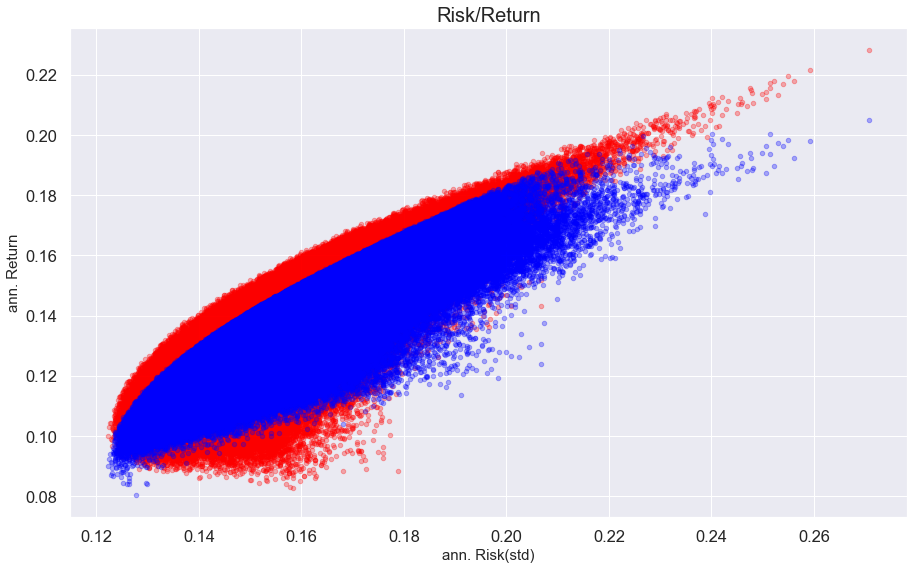

In [203]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [204]:
summ2.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1565,0.7338
std,0.0127,0.0126,0.0434
min,0.0806,0.1223,0.4739
25%,0.1264,0.1476,0.7080
50%,0.1350,0.1554,0.7387
75%,0.1434,0.1641,0.7656
max,0.2048,0.2708,0.8236


In [205]:
summ2.Sharpe.idxmax()

812452

In [206]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

Return   0.1683
Risk     0.1801
Sharpe   0.8236
Name: 812452, dtype: float64

In [207]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8834
Name: 873915, dtype: float64

In [208]:
weights[summ2.Sharpe.idxmax()]

array([0.29233733, 0.42676296, 0.10988534, 0.07280503, 0.09442998,
       0.00377936])

In [209]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

AMZN   0.2923
BA     0.4268
DIS    0.1099
IBM    0.0728
KO     0.0944
MSFT   0.0038
dtype: float64

In [210]:
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64